In [17]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv("../data/UsersWithCountry.csv")


In [3]:
df.head(10)

,Id,Reputation,CreationDate,DisplayName,LastAccessDate,WebsiteUrl,Location,AboutMe,Views,UpVotes,DownVotes,AccountId,LocationCountry
0,-1,1,2010-11-01T17:53:28.330,Community,2010-11-01T17:53:28.330,http://meta.stackexchange.com/,on the server farm,"Hi, I'm not really a person. I'm a background...",4642,0,0,-1.0,NaN
1,2,101,2010-11-01T19:19:09.697,Geoff Dalgas,2023-10-03T00:34:53.647,http://stackoverflow.com,"corvallis, or",Dev #2 who helped create Stack Overflow curren...,108,5,0,2.0,united states
2,3,101,2010-11-01T22:25:38.390,Jin,2019-08-30T05:08:29.010,http://www.8164.org,"raleigh, nc",I used to design stuff for Stack Exchange. Als...,68,24,0,21721.0,united states
3,4,6907,2010-11-01T23:01:40.147,Jonathan.,2023-07-24T00:16:54.763,http://jonathanb.co.uk,united kingdom,"I'm a 25 year old Software engineer in London,...",1354,45,3,64959.0,united kingdom
4,5,101,2010-11-02T03:56:21.077,Jason Punyon,2023-07-22T19:42:25.617,https://jasonpunyon.com,restore the data dumps,Chaotic Good w a splash of Data. Dad x2. Stack...,38,0,0,4188.0,NaN
5,6,141,2010-11-02T18:49:10.520,ahh,2024-01-09T11:28:38.320,NaN,NaN,NaN,43,2,1,35180.0,NaN
6,7,1397,2010-11-02T18:49:25.130,Nick,2021-12-31T20:58:58.910,http://www.nickoneill.name,"san francisco, ca","Ugh, another bio field. Currently That Thing ...",142,33,0,5614.0,united states
7,8,474,2010-11-02T18:50:11.503,Jamie Banks,2016-09-07T00:53:08.147,http://verbaltopology.wordpress.com,"brooklyn, ny, united states","Interested in: languages and linguistics, neur...",246,74,1,235636.0,united states
8,9,101,2010-11-02T18:50:50.327,8128,2017-12-13T17:36:23.343,NaN,"oxford, united kingdom",Hello world.,22,2,0,1149.0,united kingdom
9,11,2272,2010-11-02T18:51:04.367,Tim Goodman,2023-10-31T21:31:55.773,NaN,NaN,NaN,570,167,0,92888.0,NaN


In [19]:
LocationCountry = df["LocationCountry"]
counts = LocationCountry.value_counts().sort_values(ascending = False)
total = LocationCountry.count()
print(total)
print(counts.head(30))

56553
LocationCountry
united states                15628
india                         8024
united kingdom                4636
germany                       2897
canada                        2318
australia                     1522
france                        1362
brazil                         974
netherlands                    972
italy                          823
china                          788
spain                          684
sweden                         663
switzerland                    648
poland                         609
russian federation             534
bangladesh                     508
israel                         468
pakistan                       462
turkey                         441
belgium                        425
viet nam                       405
iran, islamic republic of      395
japan                          381
singapore                      367
norway                         358
denmark                        345
south africa                   33

Location such as: east bay, ♁, https://www.gofundme.com/f/stop-stack-overflow-from-defaming-its-users, dilaton@physicsoverflow.org. Get's filtered out, which is why 66479 - 56553 =9 926 rows get's removed as a form of cleaning from the data.

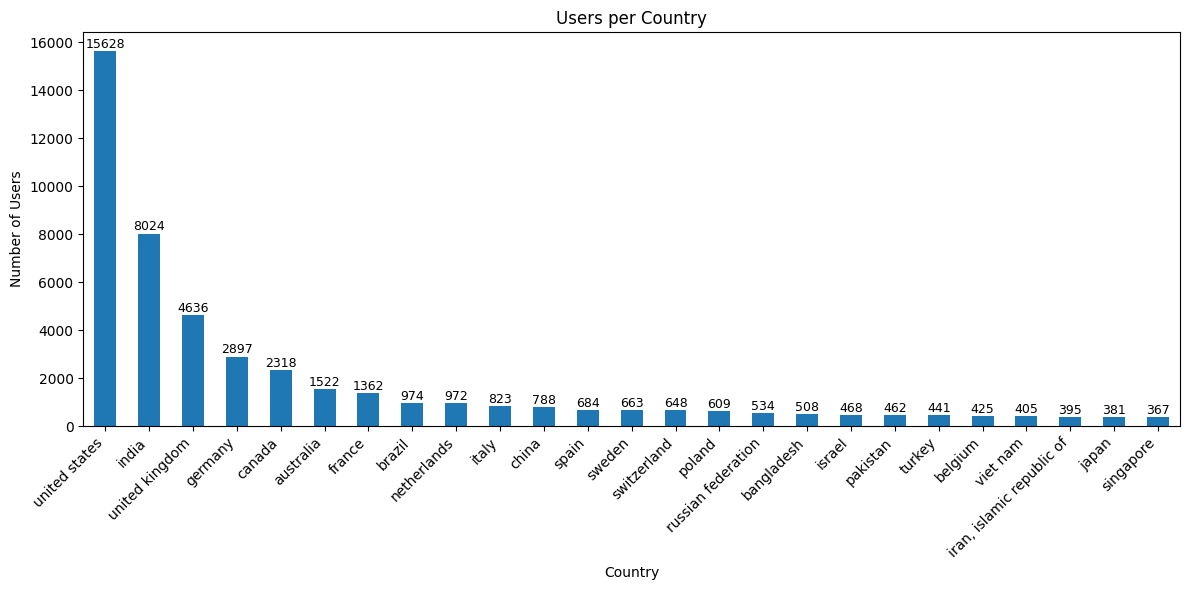

In [20]:
counts = df["LocationCountry"].value_counts().sort_values(ascending=False)
counts = counts.head(25)
ax = counts.plot(kind="bar", figsize=(12, 6))
plt.title("Users per Country")
plt.ylabel("Number of Users")
plt.xlabel("Country")
plt.xticks(rotation=45, ha="right")

# Add count labels
for i, val in enumerate(counts):
    ax.text(i, val + 1, str(val), ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()

# Visualise changes in country over time:

In [21]:
df["CreationDate"] = pd.to_datetime(df["CreationDate"])
df["Year"] = df["CreationDate"].dt.year

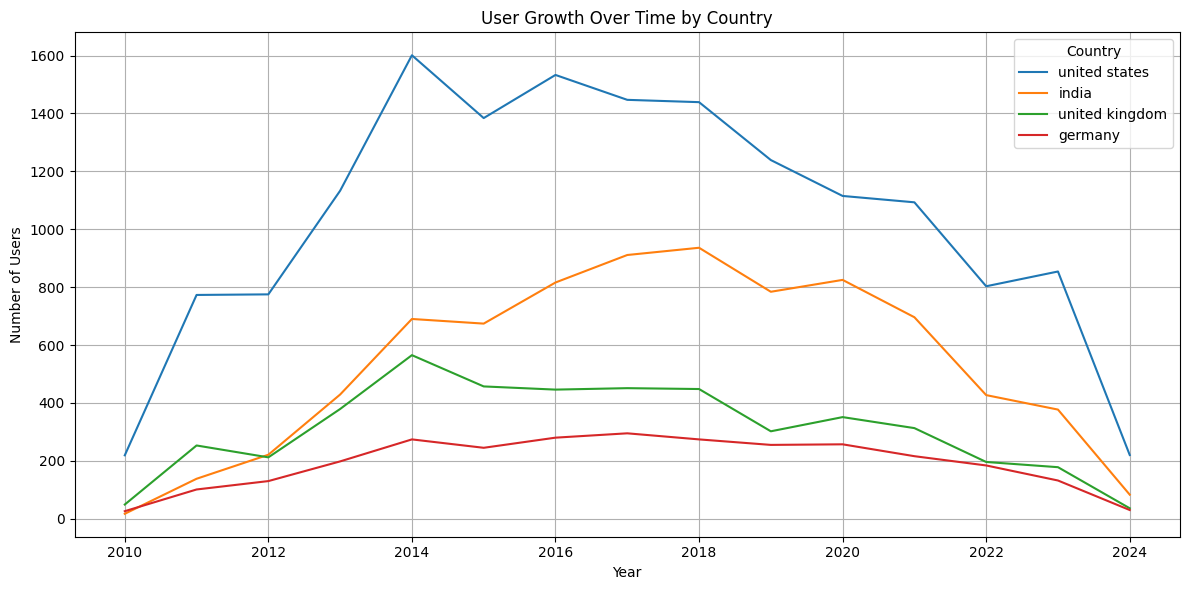

In [22]:
country_year = df.groupby(["Year", "LocationCountry"]).size().unstack(fill_value=0)

top_countries = df["LocationCountry"].value_counts().head(4).index

# Plot only those
country_year[top_countries].plot(figsize=(12, 6))

plt.title("User Growth Over Time by Country")
plt.xlabel("Year")
plt.ylabel("Number of Users")
plt.grid(True)
plt.legend(title="Country")
plt.tight_layout()
plt.show()

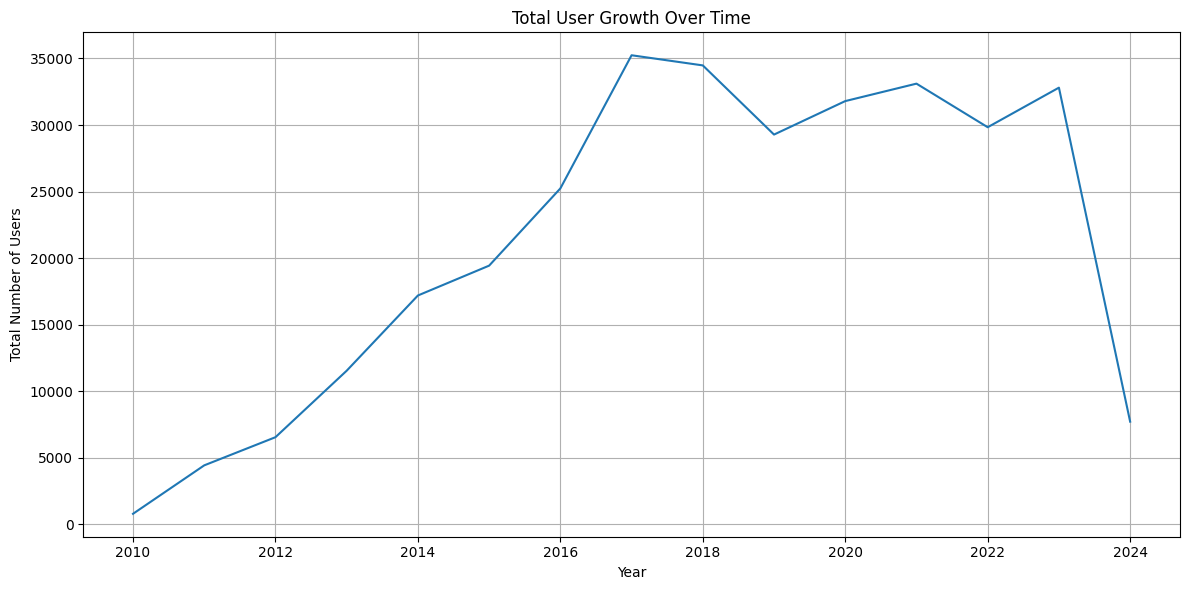

In [18]:
total_per_year = df.groupby("Year").size()

# Plot total user growth per year
total_per_year.plot(figsize=(12, 6))

plt.title("Total User Growth Over Time")
plt.xlabel("Year")
plt.ylabel("Total Number of Users")
plt.grid(True)
plt.tight_layout()
plt.show()

# Account lifetime

In [23]:
df["CreationDate"] = pd.to_datetime(df["CreationDate"])
df["LastAccessDate"] = pd.to_datetime(df["LastAccessDate"])
df["AccountLifetimeDays"] = (df["LastAccessDate"] - df["CreationDate"]).dt.days
df["AccountLifetimeYears"] = df["AccountLifetimeDays"] / 365
# split the data
under_1_year = df[df["AccountLifetimeYears"] < 1]
over_1_year = df[df["AccountLifetimeYears"] >= 1]

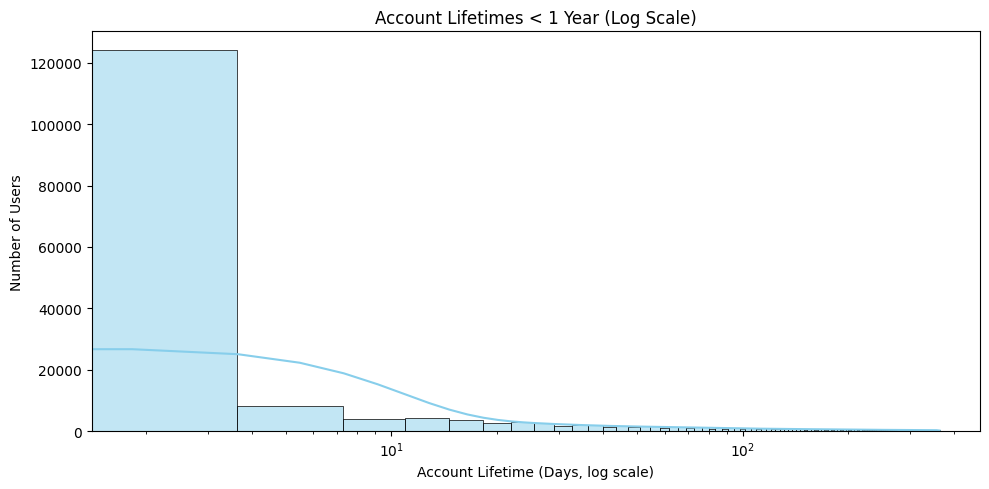

In [26]:
plt.figure(figsize=(10, 5))
sns.histplot(
    data=under_1_year,
    x="AccountLifetimeDays",
    bins=100,
    kde=True,
    color="skyblue",
    edgecolor="black"
)
plt.xscale("log")
plt.title("Account Lifetimes < 1 Year (Log Scale)")
plt.xlabel("Account Lifetime (Days, log scale)")
plt.ylabel("Number of Users")
plt.tight_layout()
plt.show()


/var/folders/7k/0ysh65352j9bnvtmhpr3kcs00000gn/T/ipykernel_36397/817205234.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  under_1_year["LifetimeBin"] = pd.cut(


,Lifetime Range (Days),Number of Users,Percentage of Users
0,0,110 001,51.52
1,1–2,11 184,5.24
2,3–6,9 328,4.37
3,7–13,8 987,4.21
4,14–29,12 626,5.91
5,30–59,13 472,6.31
6,60–89,9 436,4.42
7,90–179,17 469,8.18
8,180–364,21 012,9.84


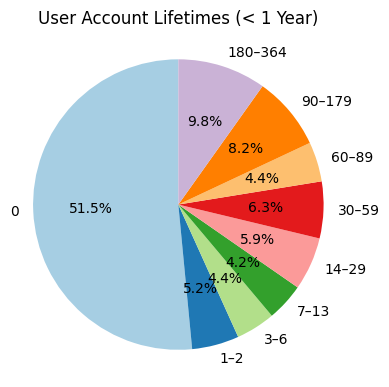

In [56]:
bins = [0, 1, 3, 7, 14, 30, 60, 90, 180, 365]
labels = ["0", "1–2", "3–6", "7–13", "14–29", "30–59", "60–89", "90–179", "180–364"]

under_1_year["LifetimeBin"] = pd.cut(
    under_1_year["AccountLifetimeDays"], bins=bins, labels=labels, right=False
)

# Compute counts and percentages
counts = under_1_year["LifetimeBin"].value_counts().sort_index()
percentages = under_1_year["LifetimeBin"].value_counts(normalize=True).sort_index().mul(100).round(2)

# Combine into table
table = pd.DataFrame({
    "Lifetime Range (Days)": labels,
    "Number of Users": counts.values,
    "Percentage of Users": percentages.values
})
table["Number of Users"] = table["Number of Users"].apply(lambda x: f"{x:,}".replace(",", " "))

from IPython.display import display
display(table)

# Create pie chart
plt.figure(figsize=(4, 4))

plt.pie(
    table["Percentage of Users"],
    labels=table["Lifetime Range (Days)"],
    autopct="%1.1f%%",
    startangle=90,
    colors=plt.cm.Paired.colors
)
plt.title("User Account Lifetimes (< 1 Year)")
plt.axis("equal")  # Make it a circle
plt.tight_layout()
plt.show()



In [57]:
quantile_bins = pd.qcut(
    under_1_year["AccountLifetimeDays"],
    q=10,
    precision=0,
    duplicates="drop"
)

quantile_table = (
    quantile_bins.value_counts(normalize=True)
    .sort_index()
    .mul(100)
    .round(2)
    .reset_index()
)
quantile_table.columns = ["Lifetime Range (Quantile)", "Percentage of Users"]

quantile_table


,Lifetime Range (Quantile),Percentage of Users
0,"(-1.0, 5.0]",60.22
1,"(5.0, 26.0]",10.08
2,"(26.0, 75.0]",9.77
3,"(75.0, 177.0]",9.95
4,"(177.0, 364.0]",9.98


,Lifetime Range,Number of Users,Percentage of Users,Raw Count
0,0 days,110 001,34.44,110001
1,1–2 days,11 184,3.50,11184
2,3–6 days,9 328,2.92,9328
3,7–13 days,8 987,2.81,8987
4,14–29 days,12 626,3.95,12626
5,30–59 days,13 472,4.22,13472
6,60–89 days,9 436,2.95,9436
7,90–179 days,17 469,5.47,17469
8,180–364 days,21 012,6.58,21012
9,1–2 years,25 354,7.94,25354


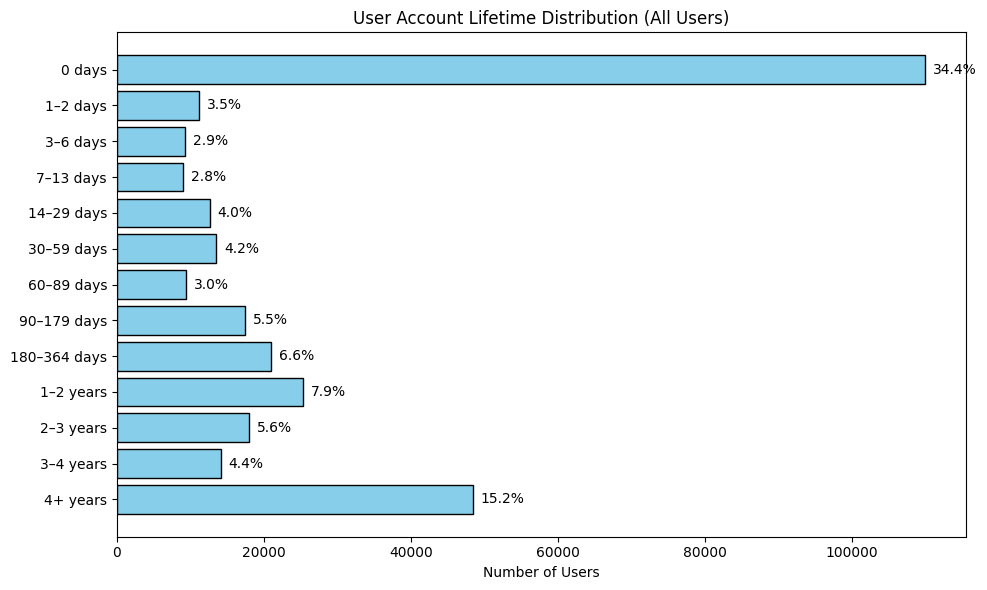

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

# Define bins and original labels
bins = [0, 1, 3, 7, 14, 30, 60, 90, 180, 365, 730, 1095, 1460, float("inf")]
labels = [
    "0", "1–2", "3–6", "7–13", "14–29", "30–59", "60–89", "90–179",
    "180–364", "1–2 years", "2–3 years", "3–4 years", "4+ years"
]

# Add " days" to day-based labels
day_labels = {"0", "1–2", "3–6", "7–13", "14–29", "30–59", "60–89", "90–179", "180–364"}
modified_labels = [label + " days" if label in day_labels else label for label in labels]

# Bin the data
df["LifetimeBin"] = pd.cut(df["AccountLifetimeDays"], bins=bins, labels=modified_labels, right=False)

# Compute counts and percentages
counts = df["LifetimeBin"].value_counts().sort_index()
percentages = df["LifetimeBin"].value_counts(normalize=True).sort_index().mul(100).round(2)

# Build table
table = pd.DataFrame({
    "Lifetime Range": modified_labels,
    "Number of Users": counts.values,
    "Percentage of Users": percentages.values
})
table["Raw Count"] = table["Number of Users"]  # used for plotting
table["Number of Users"] = table["Number of Users"].apply(lambda x: f"{x:,}".replace(",", " "))

# Display table (optional)
from IPython.display import display
display(table)

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(table["Lifetime Range"], table["Raw Count"], color="skyblue", edgecolor="black")

# Add percent labels to bars
for bar, pct in zip(bars, table["Percentage of Users"]):
    width = bar.get_width()
    plt.text(width + max(table["Raw Count"]) * 0.01, bar.get_y() + bar.get_height()/2, f"{pct:.1f}%", va='center')

plt.xlabel("Number of Users")
plt.title("User Account Lifetime Distribution (All Users)")
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()


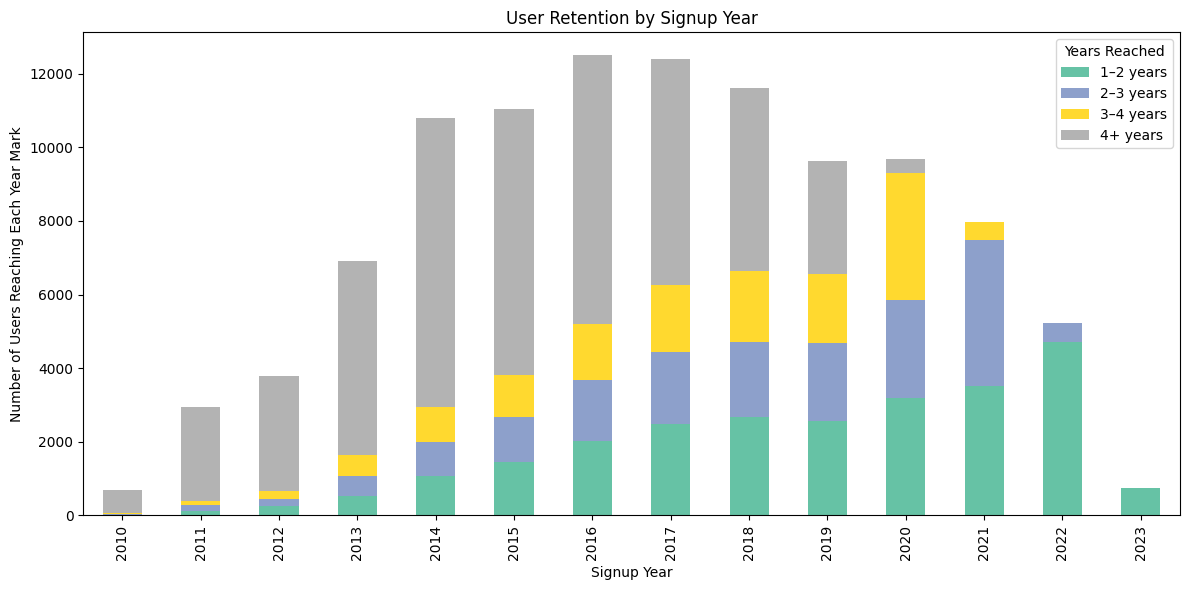

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert to datetime
df["CreationDate"] = pd.to_datetime(df["CreationDate"])

# Extract signup year
df["SignupYear"] = df["CreationDate"].dt.year

# Keep only users who reached at least 1 year
df_1yr_plus = df[df["AccountLifetimeDays"] >= 365].copy()

# Define lifetime bins (in days) and labels
bins = [365, 730, 1095, 1460, float("inf")]
labels = ["1–2 years", "2–3 years", "3–4 years", "4+ years"]


df_1yr_plus["YearsReached"] = pd.cut(
    df_1yr_plus["AccountLifetimeDays"],
    bins=bins,
    labels=labels,
    right=False
)

# Group by cohort (signup year) and how many years they reached
cohort_retention = (
    df_1yr_plus.groupby(["SignupYear", "YearsReached"])
    .size()
    .unstack(fill_value=0)
)

# Plot stacked bar chart
cohort_retention.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="Set2")
plt.title("User Retention by Signup Year")
plt.xlabel("Signup Year")
plt.ylabel("Number of Users Reaching Each Year Mark")
plt.legend(title="Years Reached")
plt.tight_layout()
plt.show()



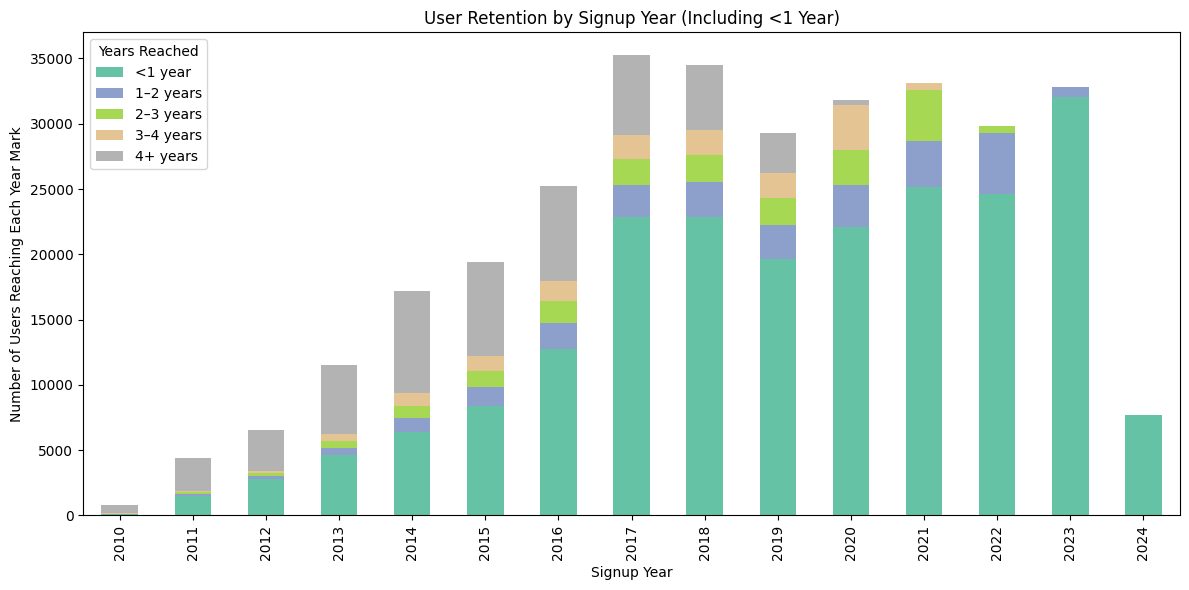

YearsReached,<1 year,1–2 years,2–3 years,3–4 years,4+ years,Total Users
SignupYear,,,,,,
2010,110 (13.9%),22 (2.8%),13 (1.6%),29 (3.7%),620 (78.1%),794
2011,1483 (33.5%),133 (3.0%),147 (3.3%),120 (2.7%),2550 (57.5%),4433
2012,2771 (42.3%),251 (3.8%),197 (3.0%),223 (3.4%),3106 (47.4%),6548
2013,4640 (40.2%),542 (4.7%),525 (4.5%),567 (4.9%),5268 (45.6%),11542
2014,6404 (37.2%),1061 (6.2%),943 (5.5%),951 (5.5%),7834 (45.6%),17193
2015,8385 (43.1%),1440 (7.4%),1245 (6.4%),1120 (5.8%),7245 (37.3%),19435
2016,12738 (50.5%),2022 (8.0%),1662 (6.6%),1518 (6.0%),7295 (28.9%),25235
2017,22839 (64.8%),2494 (7.1%),1940 (5.5%),1837 (5.2%),6129 (17.4%),35239
2018,22866 (66.3%),2671 (7.7%),2046 (5.9%),1936 (5.6%),4958 (14.4%),34477


In [89]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert to datetime
df["CreationDate"] = pd.to_datetime(df["CreationDate"])

# Extract signup year
df["SignupYear"] = df["CreationDate"].dt.year

# Define new bins and labels, including "<1 year"
bins = [0, 365, 730, 1095, 1460, float("inf")]
labels = ["<1 year", "1–2 years", "2–3 years", "3–4 years", "4+ years"]

# Bin users
df["YearsReached"] = pd.cut(df["AccountLifetimeDays"], bins=bins, labels=labels, right=False)

# Group by cohort and years reached
cohort_retention = (
    df.groupby(["SignupYear", "YearsReached"])
    .size()
    .unstack(fill_value=0)
)

# Plot
cohort_retention.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="Set2")
plt.title("User Retention by Signup Year (Including <1 Year)")
plt.xlabel("Signup Year")
plt.ylabel("Number of Users Reaching Each Year Mark")
plt.legend(title="Years Reached")
plt.tight_layout()
plt.show()

# Create table with counts + percentages
counts = cohort_retention.copy()
percentages = counts.div(counts.sum(axis=1), axis=0).mul(100).round(1)
combined = counts.astype(str) + " (" + percentages.astype(str) + "%)"
combined["Total Users"] = counts.sum(axis=1)

# Display
from IPython.display import display
display(combined)


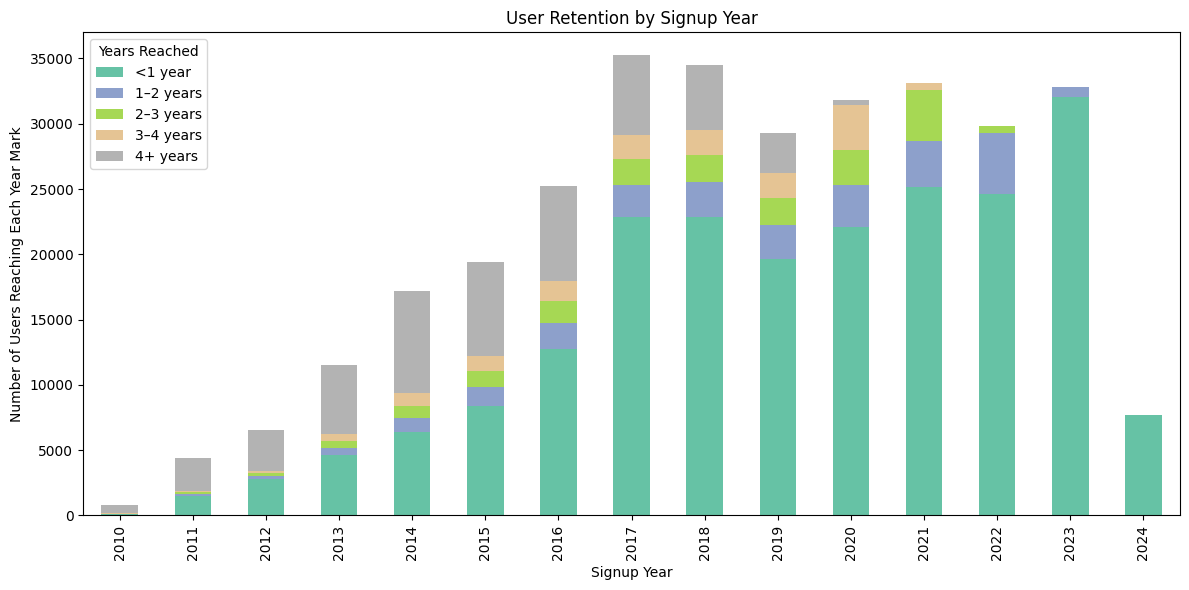

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert to datetime
df["CreationDate"] = pd.to_datetime(df["CreationDate"])

# Extract signup year
df["SignupYear"] = df["CreationDate"].dt.year

# Use all users (not just those with 1+ years)
df_all = df.copy()

# Define lifetime bins (in days) and labels
bins = [0, 365, 730, 1095, 1460, float("inf")]
labels = ["<1 year", "1–2 years", "2–3 years", "3–4 years", "4+ years"]

# Bin lifetimes into years reached
df_all["YearsReached"] = pd.cut(
    df_all["AccountLifetimeDays"],
    bins=bins,
    labels=labels,
    right=False
)

# Group by cohort (signup year) and how many years they reached
cohort_retention = (
    df_all.groupby(["SignupYear", "YearsReached"])
    .size()
    .unstack(fill_value=0)
)

# Plot stacked bar chart
cohort_retention.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="Set2")
plt.title("User Retention by Signup Year")
plt.xlabel("Signup Year")
plt.ylabel("Number of Users Reaching Each Year Mark")
plt.legend(title="Years Reached")
plt.tight_layout()
plt.show()
